# T12B model: neutrino masses

The idea is to check the anality expresion for neutrino masses with SPHENO. I will use a benchmark point

### Rotation of no hermitian mass matrices

Hermitian term:
    
$\mathcal{L}_{\text{mas}} = \psi^{\dagger} M \psi$
$\to$
$M_{\text{diag}}=U^{-1}MU$

No hermitian term:
 
$\mathcal{L}_{\text{mas}} = \psi_R^{\dagger} M \psi_L = \psi_1^{\dagger} M \psi_2$
$\to$ $\color{red}{M_{\text{diag}}^2=V^{-1}MM^TV = U^{-1}M^TMU}$


ie. the $V$ and $U$ matricess diagonalize the matrices $MM^T$ and $M^TM$ respectively

such that: $\Psi_1^i=V_{ij}\psi_1^j$ and $\Psi_2^i=U_{ij}\psi_2^j$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
#good plots
plt.rcParams.update({'font.size': 18}) 
#plt.rc('font',size='18')

In [3]:
Gf = 1.16637000E-05
vevSM = 1./np.sqrt(np.sqrt(2.)*Gf)

# Neutrino masses for a benchmark point

In [4]:
#!/usr/bin/env python
import pyslha
import pyT12B_LesHouches_generator
import subprocess
import sys

import NEUTRINO2018
import neutrino_analytic3

#Open
xdict = pyT12B_LesHouches_generator.buildSLHAinFile()

x=[]

NUM = 20

for i in range(0,NUM):
    L1 = 1.3e-1 #Warning
    L6 = 1.300E-02
    L71 = 1.01e-2
    L72 = 2.01e-2
    L73 = 3.01e-4
    mu31 = 1.01e4
    mu32 = 2.01e6
    mu33 = 1.01e14

    MN = np.exp(np.random.uniform(np.log(100.),np.log(200.)))
    MPsi = np.exp(np.random.uniform(np.log(200.),np.log(300.)))
    Meta = np.exp(np.random.uniform(np.log(300.),np.log(500.)))
    l1 = 1.02e-2
    l2 = 2.01e-3
    y1 = 1.01e-2
    y2 = 2.1e-3

    # Modific the LesHouches         
    xdict.blocks['MINPAR'].entries[1]='%.6E    # lambda1Input' %L1     
    xdict.blocks['MINPAR'].entries[2]='%.6E    # lambda61Input' %L6 
    xdict.blocks['MINPAR'].entries[5]='%.6E    # lambda71Input' %L71   
    xdict.blocks['MINPAR'].entries[6]='%.6E    # lambda72Input' %L72   
    xdict.blocks['MINPAR'].entries[7]='%.6E    # lambda73Input' %L73       
    xdict.blocks['MINPAR'].entries[8]='%.6E    # mu31Input' %mu31
    xdict.blocks['MINPAR'].entries[9]='%.6E    # mu32Input' %mu32
    xdict.blocks['MINPAR'].entries[10]='%.6E    # mu33Input' %mu33

    xdict.blocks['MNIN'].entries[1]='%.6E    # MN' %MN
    xdict.blocks['MR1IN'].entries[1]='%.6E    # Mr1' %MPsi
    xdict.blocks['MR2IN'].entries[1]='%.6E    # Mr2' %Meta
    xdict.blocks['YLR1IN'].entries[1]='%.6E    # YlR1' %l1
    xdict.blocks['YLR2IN'].entries[1]='%.6E    # YlR2' %l2
    xdict.blocks['YYR1IN'].entries[1]='%.6E    # YyR1' %y1
    xdict.blocks['YYR2IN'].entries[1]='%.6E    # YyR2' %y2

    h11 = 1e-5
    h21 = 1e-3
    h31 = 3e-3   

    h12 = 1e-6
    h22 = 2e-3
    h32 = 1e-4

    h13 = 1e-2
    h23 = 2e-2
    h33 = 3e-2

    f11 = 1e-3
    f21 = 1e-4
    f31 = 1e-4

    f12 = 1e-3
    f22 = 2e-3
    f32 = 3e-4

    f13 = 3e-2
    f23 = 2e-2
    f33 = 1e-2

    xdict.blocks['YHR1IN'].entries[1]='%.6E    # YhR1(1)' %h11 
    xdict.blocks['YHR1IN'].entries[2]='%.6E    # YhR1(2)' %h21
    xdict.blocks['YHR1IN'].entries[3]='%.6E    # YhR1(3)' %h31

    xdict.blocks['YHR2IN'].entries[1]='%.6E    # YhR2(1)' %h12 
    xdict.blocks['YHR2IN'].entries[2]='%.6E    # YhR2(2)' %h22
    xdict.blocks['YHR2IN'].entries[3]='%.6E    # YhR2(3)' %h32

    xdict.blocks['YHR3IN'].entries[1]='%.6E    # YhR3(1)' %h13 
    xdict.blocks['YHR3IN'].entries[2]='%.6E    # YhR3(2)' %h23
    xdict.blocks['YHR3IN'].entries[3]='%.6E    # YhR3(3)' %h33

    xdict.blocks['YFR1IN'].entries[1]='%.6E    # YfR1(1)' %f11 
    xdict.blocks['YFR1IN'].entries[2]='%.6E    # YfR1(2)' %f21
    xdict.blocks['YFR1IN'].entries[3]='%.6E    # YfR1(3)' %f31

    xdict.blocks['YFR2IN'].entries[1]='%.6E    # YfR2(1)' %f12 
    xdict.blocks['YFR2IN'].entries[2]='%.6E    # YfR2(2)' %f22
    xdict.blocks['YFR2IN'].entries[3]='%.6E    # YfR2(3)' %f32

    xdict.blocks['YFR3IN'].entries[1]='%.6E    # YfR3(1)' %f13 
    xdict.blocks['YFR3IN'].entries[2]='%.6E    # YfR3(2)' %f23
    xdict.blocks['YFR3IN'].entries[3]='%.6E    # YfR3(3)' %f33

    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.T12B_low',xdict)    

    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoT12B LesHouches.in.T12B_low')    
    SPheno_output = subprocess.getoutput('cat SPheno.spc.T12B')

    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fk')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fk')[1].split()[1])           
    mv2 = eval(SPheno_output.split('# Fk')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fk')[1].split()[9])  

    MS1 = eval(SPheno_output.split('# Mass spectrum')[1].split()[10])
    MS2 = eval(SPheno_output.split('# Mass spectrum')[1].split()[14])
    MS3 = eval(SPheno_output.split('# Mass spectrum')[1].split()[18])

    mx1 = eval(SPheno_output.split('Fe_3')[1].split()[1])
    mx2 = eval(SPheno_output.split('Fe_3')[1].split()[5])
    mx3 = eval(SPheno_output.split('Fe_3')[1].split()[9])

    U11 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[6])
    U12 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[11])
    U13 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[16])
    U21 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[21])
    U22 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[26])
    U23 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[31])
    U31 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[36])
    U32 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[41])
    U33 = eval(SPheno_output.split('Block LNEUTROMIX')[1].split()[46])

    V11 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[6])
    V12 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[11])
    V13 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[16])
    V21 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[21])
    V22 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[26])
    V23 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[31])
    V31 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[36])
    V32 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[41])
    V33 = eval(SPheno_output.split('Block RNEUTROMIX')[1].split()[46])

    x.append([L1,L6,L71,L72,L73,mu31,mu32,mu33,MN,MPsi,Meta,l1,l2,y1,y2,h11,h21,h31,h12,h22,h32,h13,h23,h33,f11,f21,f31,\
              f12,f22,f32,f13,f23,f33,mv1,mv2,mv3,MS1,MS2,MS3,mx1,mx2,mx3,V11,V12,V13,V21,V22,V23,V31,V32,V33,\
              U11,U12,U13,U21,U22,U23,U31,U32,U33])

x=np.asarray(x)
    
xd=pd.DataFrame(x,columns=['L1','L6','L71','L72','L73','mu31','mu32','mu33','MN','MPsi','Meta','l1','l2','y1','y2',\
                           'h11','h21','h31','h12','h22','h32','h13','h23','h33','f11','f21','f31','f12','f22',\
                           'f32','f13','f23','f33','mv1','mv2','mv3','MS1','MS2','MS3','mx1','mx2','mx3',\
                           'V11','V12','V13','V21','V22','V23','V31','V32','V33','U11','U12','U13','U21',\
                           'U22','U23','U31','U32','U33'])       

In [6]:
xd[:3]

,L1,L6,L71,L72,L73,mu31,mu32,mu33,MN,MPsi,...,V33,U11,U12,U13,U21,U22,U23,U31,U32,U33
0,0.13,0.013,0.0101,0.0201,0.000301,10100.0,2010000.0,1.010000e+14,149.766236,231.882124,...,0.999988,0.999997,2.714572e-07,-0.002507,-3.590941e-07,1.0,-0.000035,0.002507,0.000035,0.999997
1,0.13,0.013,0.0101,0.0201,0.000301,10100.0,2010000.0,1.010000e+14,183.814713,203.281699,...,0.999988,0.999996,1.302085e-06,-0.002675,-1.378574e-06,1.0,-0.000029,0.002675,0.000029,0.999996
2,0.13,0.013,0.0101,0.0201,0.000301,10100.0,2010000.0,1.010000e+14,125.944230,284.801941,...,0.999988,0.999997,1.179828e-07,-0.002401,-2.411202e-07,1.0,-0.000051,0.002401,0.000051,0.999997


In [7]:
#Loop factor
def LAMBDA(mj,mSi,Vj2,Uj1):
    
    Lji = 1./(16.*np.pi**2)*Vj2*Uj1*(mj**3/(mj**2-mSi**2))*np.log(mj**2/mSi**2)
    
    return Lji   

In [8]:
#Mab matrix. sum over j and i (a,b) means (alpha,beta) elements of the matrix
def Mab(ha1,ha2,ha3,fb1,fb2,fb3,m1,m2,m3,ms1,ms2,ms3,V12,V22,V32,U11,U21,U31):
    
    #sum over j with i=1
    sumS1= (LAMBDA(m1, ms1, V12, U11) + LAMBDA(m2, ms1, V22, U21) + LAMBDA(m3, ms1, V32, U31))*(ha1*fb1) 
    #sum over j with i=2  
    sumS2= (LAMBDA(m1, ms2, V12, U11) + LAMBDA(m2, ms2, V22, U21) + LAMBDA(m3, ms2, V32, U31))*(ha2*fb2) 
    #sum over j with i=3  
    sumS3= (LAMBDA(m1, ms3, V12, U11) + LAMBDA(m2, ms3, V22, U21) + LAMBDA(m3, ms3, V32, U31))*(ha3*fb3) 
    
    return sumS1+sumS2+sumS3

In [9]:
#Compute the neutrino eigenvalues
#(h,f) means the kind of Yukawa
def MATRIX_NU_DIAG(h11,h12,h13,h21,h22,h23,h31,h32,h33,f11,f12,f13,f21,f22,f23,f31,f32,f33,\
                   ms1,ms2,ms3,m1,m2,m3,V12,V22,V32,U11,U21,U31):    
    
    #Matrix elements
    M11 = Mab(h11,h12,h13,f11,f12,f13,m1,m2,m3,ms1,ms2,ms3,V12,V22,V32,U11,U21,U31)
    
    M12 = Mab(h11,h12,h13,f21,f22,f23,m1,m2,m3,ms1,ms2,ms3,V12,V22,V32,U11,U21,U31)
    M13 = Mab(h11,h12,h13,f31,f32,f33,m1,m2,m3,ms1,ms2,ms3,V12,V22,V32,U11,U21,U31)
    M21 = Mab(h21,h22,h23,f11,f12,f13,m1,m2,m3,ms1,ms2,ms3,V12,V22,V32,U11,U21,U31)
    M22 = Mab(h21,h22,h23,f21,f22,f23,m1,m2,m3,ms1,ms2,ms3,V12,V22,V32,U11,U21,U31)
    M23 = Mab(h21,h22,h23,f31,f32,f33,m1,m2,m3,ms1,ms2,ms3,V12,V22,V32,U11,U21,U31)
    M31 = Mab(h31,h32,h33,f11,f12,f13,m1,m2,m3,ms1,ms2,ms3,V12,V22,V32,U11,U21,U31)
    
    M32 = Mab(h31,h32,h33,f21,f22,f23,m1,m2,m3,ms1,ms2,ms3,V12,V22,V32,U11,U21,U31)
    
    M33 = Mab(h31,h32,h33,f31,f32,f33,m1,m2,m3,ms1,ms2,ms3,V12,V22,V32,U11,U21,U31)


    Mvij = np.matrix( [[M11, M12, M13],
                       [M21, M22, M23],
                       [M31, M32, M33]] )

    #eigenvalues e eigenvectors
    (Mdiag2,V)=np.linalg.eig(Mvij*np.transpose(Mvij))
    
    #took eigenvalues
    MX1 = np.sqrt(np.abs(Mdiag2[0]))
    MX2 = np.sqrt(np.abs(Mdiag2[1]))
    MX3 = np.sqrt(np.abs(Mdiag2[2]))
    
    ## reorganize the eigenvalues (neutrino masses)
    mn1 = 0.0
    mn2 = 0.0
    mn3 = 0.0

    if MX1 < MX2 and MX1 < MX3:
        mn1 = MX1
        #print "Hola1"

        if MX2 < MX3:
            mn2 = MX2
            mn3 = MX3
        else:
            mn2 = MX3
            mn3 = MX2  

    if MX2 < MX1 and MX2 < MX3:
        mn1 = MX2
        #print "Hola2" 

        if MX1 < MX3:
            mn2 = MX1
            mn3 = MX3
        else:
            mn2 = MX3
            mn3 = MX1   

    if MX3 < MX1 and MX3 < MX2:
        mn1 = MX3
        #print "Hola3"  

        if MX1 < MX2:
            mn2 = MX1
            mn3 = MX2
        else:
            mn2 = MX2
            mn3 = MX1

    return mn1, mn2, mn3

In [10]:
print("===============================================")
print("Anality:")
MM = MATRIX_NU_DIAG(xd.h11[0],xd.h12[0],xd.h13[0],xd.h21[0],xd.h22[0],xd.h23[0],xd.h31[0],xd.h32[0],xd.h33[0],\
                    xd.f11[0],xd.f12[0],xd.f13[0],xd.f21[0],xd.f22[0],xd.f23[0],xd.f31[0],xd.f32[0],xd.f33[0],\
                    xd.MS1[0],xd.MS2[0],xd.MS3[0],xd.mx1[0],xd.mx2[0],xd.mx3[0],xd.V12[0],xd.V22[0],xd.V32[0],\
                    xd.U11[0],xd.U21[0],xd.U31[0])
print("mv1=",MM[0],"mv2=",MM[1],"mv3=",MM[2])
print("===============================================")
print("SPHENO:")
print("mv1=",mv1,"mv2=",mv2,"mv3=",mv3)
print("===============================================")

Anality:
mv1= 4.97663393973e-20 mv2= 2.17032447709e-14 mv3= 1.70282801898e-13
SPHENO:
mv1= 5.23193601e-21 mv2= 2.79332538e-14 mv3= 1.49194621e-13


Add to the DataFrame

In [11]:
xd.shape

(20, 60)

In [12]:
y=[]
for i in range(0,xd.shape[0]):
    
    kk = MATRIX_NU_DIAG(xd.h11[i],xd.h12[i],xd.h13[i],xd.h21[i],xd.h22[i],xd.h23[i],xd.h31[i],xd.h32[i],xd.h33[i],\
                    xd.f11[i],xd.f12[i],xd.f13[i],xd.f21[i],xd.f22[i],xd.f23[i],xd.f31[i],xd.f32[i],xd.f33[i],\
                    xd.MS1[i],xd.MS2[i],xd.MS3[i],xd.mx1[i],xd.mx2[i],xd.mx3[i],xd.V12[i],xd.V22[i],xd.V32[i],\
                    xd.U11[i],xd.U21[i],xd.U31[i])
    mn1 = kk[0]
    mn2 = kk[1]
    mn3 = kk[2]
    
    y.append([mn1,mn2,mn3])
    
y=np.asarray(y)
    
yd=pd.DataFrame(y,columns=['mn1','mn2','mn3'])     

In [14]:
yd[:3]

,mn1,mn2,mn3
0,4.976634e-20,2.170324e-14,1.702828e-13
1,5.036820e-20,2.014237e-14,1.826758e-13
2,5.272057e-20,2.469248e-14,1.408957e-13


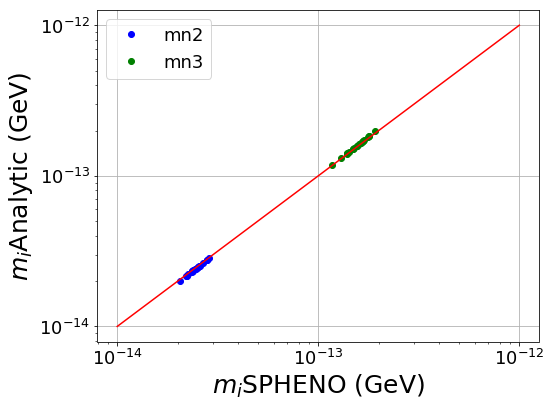

In [21]:
plt.figure(figsize=(8,6))

#plt.loglog(xd.mv1,yd.mn1,'ro')
plt.loglog(xd.mv2,yd.mn2,'bo')
plt.loglog(xd.mv3,yd.mn3,'go')

a = np.linspace(1e-14,1e-12,20)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_i$SPHENO (GeV)',size=25)
plt.ylabel(r'$m_i$Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')

In [26]:
xd['mv2'][:3]

0    2.209012e-14
1    2.060879e-14
2    2.508336e-14
Name: mv2, dtype: float64

In [27]:
yd['mn2'][:3]

0    2.170324e-14
1    2.014237e-14
2    2.469248e-14
Name: mn2, dtype: float64

Longas overleaf notes

$$
\sum_{i=1}^3 m_{\chi^0_l} U_{2l}^{*}V_{1l} = 0
$$

In [29]:
mx1*U21*V11 + mx2*U22*V12 + mx3*U23*V13

0.0005505459530911696

me

$$
\sum_{i=1}^3 m_{\chi^0_l} U_{j1}^{*}V_{j2} = 0
$$

In [28]:
mx1*U11*V12 + mx2*U21*V22 + mx3*U31*V32

-5.0625838844589165e-08

In [70]:
mx1*V11*U12 + mx2*V21*U22 + mx3*V31*U32

1.1899991004475207e-07

In [30]:
SPheno_output.splitlines()

['# SUSY Les Houches Accord 2 - T12B Spectrum + Decays + Flavour Observables',
 '# SPheno module generated by SARAH',
 '# ----------------------------------------------------------------------',
 '# SPheno v4.0.3  ',
 '#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101',
 '#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573',
 '# SARAH: 4.14.4  ',
 '#   F. Staub; arXiv:0806.0538 (online manual)',
 '#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863',
 '#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840',
 '#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906',
 '#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 ',
 '# Including the calculation of flavor observables based on FlavorKit ',
 '#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 ',
 '# Two-loop mass corrections to Higgs fields based on ',
 '#   M. D. Goods